# 逻辑函数（Sigmoid函数）

- x趋向正无穷时，函数值趋于1
- x趋向负无穷时，函数值趋向0
- x趋向0时，函数值趋向1/2

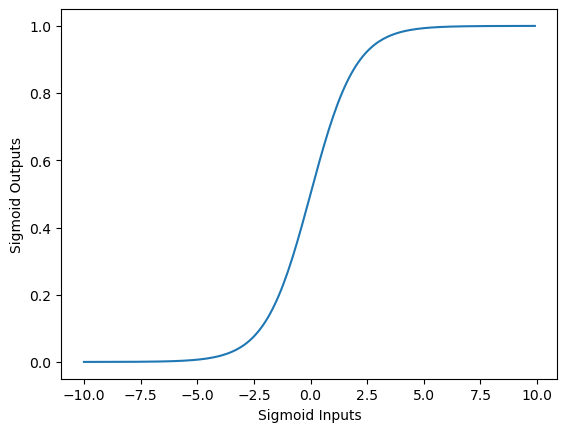

In [3]:
import numpy as np
import matplotlib.pyplot as plt
def sigmoid(x):
    return 1.0/(1+np.exp(-x))
 
sigmoid_inputs = np.arange(-10,10,0.1)
sigmoid_outputs = sigmoid(sigmoid_inputs)
# print("Sigmoid Function Input :: {}".format(sigmoid_inputs))
# print("Sigmoid Function Output :: {}".format(sigmoid_outputs))
 
plt.plot(sigmoid_inputs,sigmoid_outputs)
plt.xlabel("Sigmoid Inputs")
plt.ylabel("Sigmoid Outputs")
plt.show()

# 鸢尾花逻辑回归

## 准备数据和必要的模块

In [12]:
# 导入模块
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np
# 加载iris数据集
iris= load_iris()`
X = iris.data
y = iris.target
# 拆分数据集
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=8)
print("训练集维度",X_train.shape)
print("测试集维度",X_test.shape)
print("目标分类标签取值",np.unique(y))

训练集维度 (112, 4)
测试集维度 (38, 4)
目标分类标签取值 [0 1 2]


## 创建逻辑回归模型并训练

In [16]:
clf1 = LogisticRegression(solver='liblinear',multi_class='ovr')
clf1.fit(X_train,y_train)
print("训练集得分：",clf1.score(X_train,y_train))
print("测试集得分：",clf1.score(X_test,y_test))

训练集得分： 0.9553571428571429
测试集得分： 0.9473684210526315


In [17]:
clf1 = LogisticRegression(solver='lbfgs',multi_class='multinomial')
clf1.fit(X_train,y_train)
print("训练集得分：",clf1.score(X_train,y_train))
print("测试集得分：",clf1.score(X_test,y_test))

训练集得分： 0.9732142857142857
测试集得分： 0.9210526315789473


# 判断肿瘤是良性还是恶性

## 导入breast_cancer数据

In [9]:
from sklearn.datasets import load_breast_cancer
import numpy as np
、。
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
print("breast_cancer数据集的维度为：",X.shape)
print("breast_cancer数据集的类别标签为：",np.unique(y))
# 输出数据集中标注好的肿瘤分类
print("肿瘤分类：",cancer['target_names'])

breast_cancer数据集的维度为： (569, 30)
breast_cancer数据集的类别标签为： [0 1]
肿瘤分类： ['malignant' 'benign']


## 数据集拆分

In [13]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=23)
print("训练集数据维度：",X_train.shape)
print("训练集标签维度：",y_train.shape)
print("测试集数据维度：",X_test.shape)
print("测试集标签维度：",y_test.shape)

训练集数据维度： (455, 30)
训练集标签维度： (455,)
测试集数据维度： (114, 30)
测试集标签维度： (114,)


## 对数据集进行标准化处理

In [16]:
from sklearn.preprocessing import StandardScaler
# 对训练集进行拟合生成规则
scaler = StandardScaler().fit(X_train)
# 对训练集数据进行转换
x_train_scaled = scaler.transform(X_train)
# 对测试集数据进行转换
x_test_scaled = scaler.transform(X_test)

print("标准化前训练集数据的最小值和最大值：{0},{1}".format(X_train.min(),X_train.max()))
print("标准化后训练集数据的最小值和最大值：{0},{1}".format(x_train_scaled.min(),x_train_scaled.max()))
print("标准化前测试集集数据的最小值和最大值：{0},{1}".format(X_test.min(),X_test.max()))
print("标准化前测试集集数据的最小值和最大值：{0},{1}".format(x_test_scaled.min(),x_test_scaled.max()))

标准化前训练集数据的最小值和最大值：0.0,3432.0
标准化后训练集数据的最小值和最大值：-3.0877053290545198,11.680515420660797
标准化前测试集集数据的最小值和最大值：0.0,4254.0
标准化前测试集集数据的最小值和最大值：-2.3899291620166054,12.079675233802533


## 构建逻辑回归模型并训练模型

In [19]:
# 导入逻辑回归模型
from sklearn.linear_model import LogisticRegression
# 构建模型对象
log_reg = LogisticRegression(solver='lbfgs')
# 训练模型
log_reg.fit(x_train_scaled,y_train)
print("训练集得分：{:.2f}".format(log_reg.score(x_train_scaled,y_train)))

训练集得分：0.99


## 逻辑回归模型分析与评估

In [24]:
# 查看模型各特征的相关系数、截距和迭代次数
print("各特征的相关系数为：\n",log_reg.coef_)
print("模型的截距为：",log_reg.intercept_)
print("模型的迭代次数：",log_reg.n_iter_)

各特征的相关系数为：
 [[-0.27606602 -0.30310086 -0.29072665 -0.3524495  -0.08887332  0.69489667
  -0.83159164 -0.90390551  0.04029888  0.36520447 -1.19757111  0.35202956
  -0.74109251 -0.97521346 -0.27495612  0.6191506   0.25707841 -0.35592781
   0.17637931  0.52153286 -0.87737574 -1.40343681 -0.76559961 -0.90697874
  -0.79031648 -0.01037606 -0.93300924 -0.95154361 -0.90587541 -0.17442082]]
模型的截距为： [0.10606283]
模型的迭代次数： [32]


In [27]:
# 测试集的准确率
test_score = log_reg.score(x_test_scaled,y_test)
# 预测类别标签
test_pred = log_reg.predict(x_test_scaled)
# 类别的概率估计
test_prob = log_reg.predict_proba(x_test_scaled)
print("测试集准确率为：".format(test_score))
print("预测测试集前5个结果为：",test_pred[:5])
print("测试集前5个对应类别的概率为：",np.round(test_prob[:5],2))

测试集准确率为：
预测测试集前5个结果为： [1 0 0 1 0]
测试集前5个对应类别的概率为： [[0.   1.  ]
 [0.54 0.46]
 [1.   0.  ]
 [0.03 0.97]
 [1.   0.  ]]
